In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#importamos librería
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import folium
import plotly.express as px
from scipy import stats


In [6]:
df=pd.read_csv("/content/drive/MyDrive/proyectos machine learning/Indian Loan Risk | EDA + Prediction/Applicant-details.csv")
df.sample(20)

,Applicant_ID,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
66480,45253,7090163,52,17,single,rented,no,Civil_servant,Tiruvottiyur,Tamil_Nadu,7,11,0
77432,64567,3524413,77,5,single,rented,no,Artist,Giridih,Jharkhand,5,11,1
46425,74977,1364478,33,2,single,rented,no,Official,Akola,Maharashtra,2,11,1
96492,24996,9310823,78,4,married,rented,no,Technical_writer,Ongole,Andhra_Pradesh,3,12,0
1600,23884,9932138,45,19,single,rented,no,Official,Vijayawada,Andhra_Pradesh,9,14,0
93660,45437,7204122,73,14,married,rented,yes,Army_officer,Kirari_Suleman_Nagar,Delhi,14,11,0
86192,5005,8746952,28,20,single,rented,no,Design_Engineer,Ambarnath,Maharashtra,13,10,0
93280,30025,1620737,54,18,single,rented,yes,Librarian,Munger,Bihar,10,11,0
16111,72429,2421544,46,17,single,rented,no,Artist,Morena,Madhya_Pradesh,6,13,1
16884,75065,8310425,59,6,married,rented,no,Scientist,Thanjavur,Tamil_Nadu,6,14,0


Limpieza e Inspección de Datos: Se deben identificar los valores faltantes en el conjunto de datos y entender cómo se distribuyen entre las variables. La gestión de estos puede incluir técnicas como la imputación o eliminación de registros.

-Comprensión de Datos: Es crucial describir los tipos de datos de cada variable y corregir cualquier inconsistencia o error en el formato.

-Detección de Valores Atípicos: En columnas numéricas como Ingresos Anuales o Experiencia Laboral, se deben identificar valores atípicos y decidir cómo manejarlos, posiblemente mediante transformaciones o eliminación.

-Análisis Exploratorio de Datos (EDA): Se analiza la distribución de los Ingresos Anuales y se investiga si hay diferencias significativas en los niveles de ingreso basados en factores como Ocupación o Estado de Residencia.

-Exploración de Relaciones: Se explora la relación entre la Experiencia Laboral y la Edad del Solicitante.

Análisis Categórico: Se debe determinar si hay diferencias estadísticamente significativas en el Riesgo de Incumplimiento de Préstamos entre solicitantes con diferentes Estados Civiles, utilizando pruebas adecuadas.

-Importancia de las Características: Identificar la Ocupación más común y analizar si algunas ocupaciones están sobrerrepresentadas entre solicitantes con alto riesgo de incumplimiento de préstamos.

-Ingeniería de Características: (a) Crear nuevas características que puedan ser más informativas para predecir el Riesgo de Incumplimiento de Préstamo, como un puntaje de estabilidad que combine Años en el Empleo Actual y Años en la Residencia Actual. (b) Identificar indicadores fuertes para predecir la tasa de incumplimiento de préstamos.

Construcción de Modelos: Construir un modelo de ML para predecir el Riesgo de Incumplimiento de Pr

In [7]:
df.info(verbose = False)
# Este dataframe tiene 100000 filas y 13 columnas
# las columnas tienen datos de tipo int64(7) - object(6)
#NO hay nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 13 entries, Applicant_ID to Loan_Default_Risk
dtypes: int64(7), object(6)
memory usage: 9.9+ MB


In [8]:
df.isna().sum()

Applicant_ID                   0
Annual_Income                  0
Applicant_Age                  0
Work_Experience                0
Marital_Status                 0
House_Ownership                0
Vehicle_Ownership(car)         0
Occupation                     0
Residence_City                 0
Residence_State                0
Years_in_Current_Employment    0
Years_in_Current_Residence     0
Loan_Default_Risk              0
dtype: int64

In [9]:
# me quedo con el MachineIdentifier como identificador unico de fila , ya que la veo la mas correcta para ello
df.set_index('Applicant_ID',inplace=True)

### Analisis del Target

In [10]:
TARGET = "Loan_Default_Risk"

In [11]:
df[TARGET].describe()

count    100000.000000
mean          0.129970
std           0.336272
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Loan_Default_Risk, dtype: float64

In [12]:
df[TARGET].head()

Applicant_ID
75722    0
80185    0
19865    0
76700    1
92992    0
Name: Loan_Default_Risk, dtype: int64

<Axes: xlabel='Loan_Default_Risk', ylabel='count'>

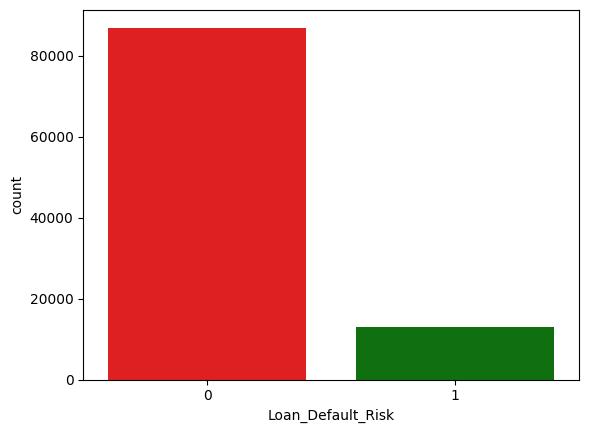

In [13]:
#vamos a ver en que proporcion tiene nuestro dataset los datos:
sns.countplot(data=df, x=TARGET)
palette = {0: "red", 1: "green"}  # 0 es rojo, 1 es verde
sns.countplot(data=df, x=TARGET, hue=TARGET, palette=palette, legend=False)

In [14]:
# media del target :
print("la media de nuestro target es :" , df[TARGET].mean(),"%")

la media de nuestro target es : 0.12997 %


In [15]:
# se puede observar que la variable target esta poco baleanceada
df[TARGET].value_counts()

0    87003
1    12997
Name: Loan_Default_Risk, dtype: int64

<ipython-input-16-c8a84e5ebeb4>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df[TARGET]<=1


<Axes: xlabel='Loan_Default_Risk', ylabel='Density'>

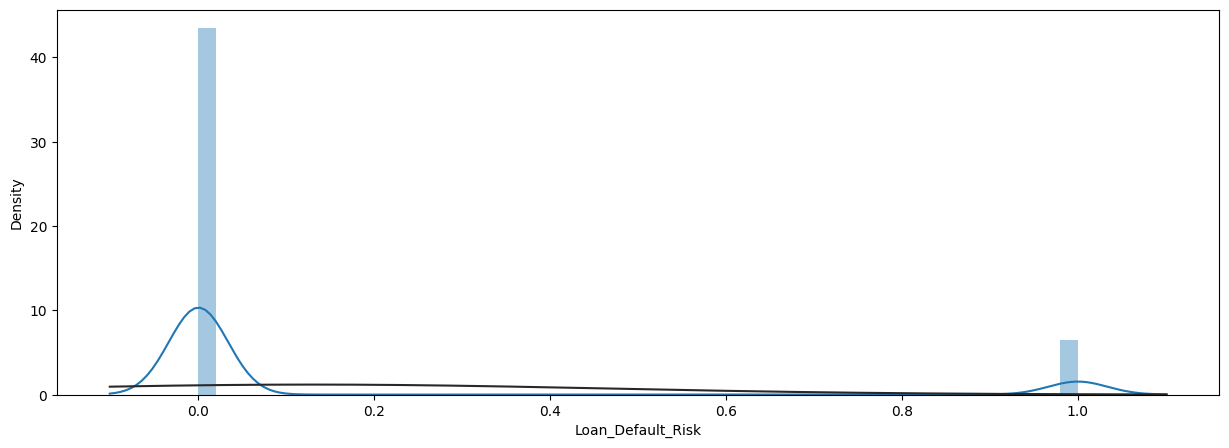

In [16]:
plt.figure(figsize=(15,5))
sns.distplot(df[df[TARGET]<=1
                ][TARGET], fit = stats.norm)

In [17]:
#Conclusiones:
#la Target no esta muy balanceada la possibilidad de impago es lo mas habitual
# no tenemos nulos en el TARGET
# el 82% de los clientes tienen possibilidad de impago segun nuestro dataset

In [18]:
list(zip(df.columns, df.dtypes))

[('Annual_Income', dtype('int64')),
 ('Applicant_Age', dtype('int64')),
 ('Work_Experience', dtype('int64')),
 ('Marital_Status', dtype('O')),
 ('House_Ownership', dtype('O')),
 ('Vehicle_Ownership(car)', dtype('O')),
 ('Occupation', dtype('O')),
 ('Residence_City', dtype('O')),
 ('Residence_State', dtype('O')),
 ('Years_in_Current_Employment', dtype('int64')),
 ('Years_in_Current_Residence', dtype('int64')),
 ('Loan_Default_Risk', dtype('int64'))]

<Axes: xlabel='Annual_Income'>

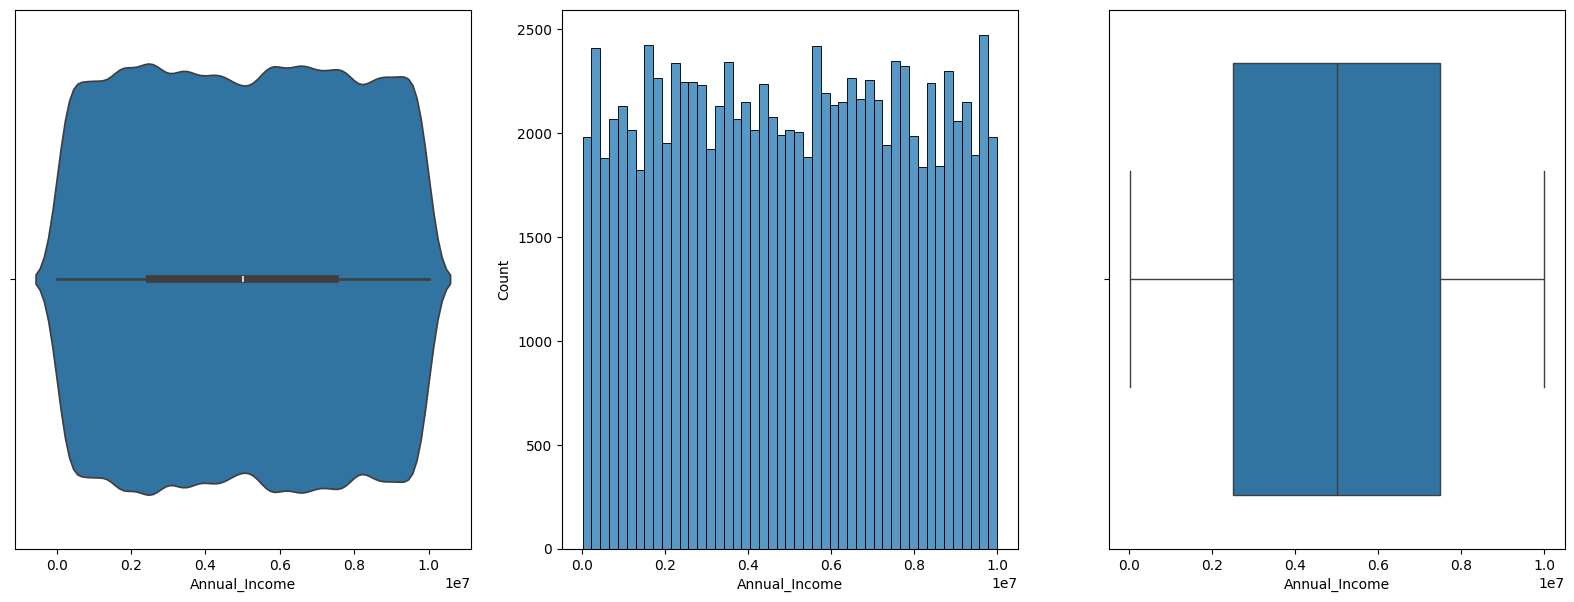

In [19]:
# creamos tres plots para ver possibles outliers (ingreso Anual):
plot, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (20, 7))
sns.violinplot(data = df, x='Annual_Income', ax = axes[0])
sns.histplot(data = df, x='Annual_Income', ax = axes[1])
sns.boxplot(data = df, x = 'Annual_Income', ax= axes[2])

In [20]:
#conclusiones :
#vemos que los datos estan bastante centrados y no hay outliers que destaquen

In [21]:
#esta funcion se utilizara para hacer el describe , value counts , hist de cada columna para hacerlo mas ameno y menos repetitivo
def analizar_columna(df, columna):


    if columna not in df.columns:
        print(f"La columna '{columna}' no existe en el DataFrame.")
        return

    # 1. Conteo de valores únicos
    print(f"Conteo de valores únicos en '{columna}':\n{df[columna].value_counts()}\n")

    # 2. Estadísticas descriptivas
    print(f"Estadísticas descriptivas de '{columna}':\n{df[columna].describe()}\n")
    # 3. Valor máximo y mínimo
    max_value = df[columna].max()
    min_value = df[columna].min()
    print(f"Valor máximo en '{columna}': {max_value}")
    print(f"Valor mínimo en '{columna}': {min_value}")
    # 4. Histograma de la columna
    if df[columna].dtype in ['object']:
             plt.figure(figsize=(10, 6))
             sns.histplot(df[columna], bins=25, kde=False, color='green')
             plt.title(f"Histograma de '{columna}'")
             plt.xlabel(columna)
             plt.ylabel("Frecuencia")
             plt.xticks(rotation=45, ha='right')
             plt.grid(False)
             plt.show()
     # Solo para columnas numéricas
    if df[columna].dtype in ['int64', 'float64']:
            plt.figure(figsize=(10, 6))
            sns.histplot(df[columna], bins=25, kde=False, color='green')
            plt.title(f"Histograma de '{columna}'")
            plt.xlabel(columna)
            plt.ylabel("Frecuencia")
            plt.xticks(rotation=45, ha='right')
            plt.grid(False)
            plt.show()

Conteo de valores únicos en 'Annual_Income':
7936020    37
1996629    34
9345456    33
9775375    31
7339398    19
           ..
4254644    11
3846207    11
1303834     1
4634680     1
7315840     1
Name: Annual_Income, Length: 5999, dtype: int64

Estadísticas descriptivas de 'Annual_Income':
count    1.000000e+05
mean     5.001617e+06
std      2.876394e+06
min      1.031000e+04
25%      2.507092e+06
50%      5.004938e+06
75%      7.477502e+06
max      9.999180e+06
Name: Annual_Income, dtype: float64

Valor máximo en 'Annual_Income': 9999180
Valor mínimo en 'Annual_Income': 10310


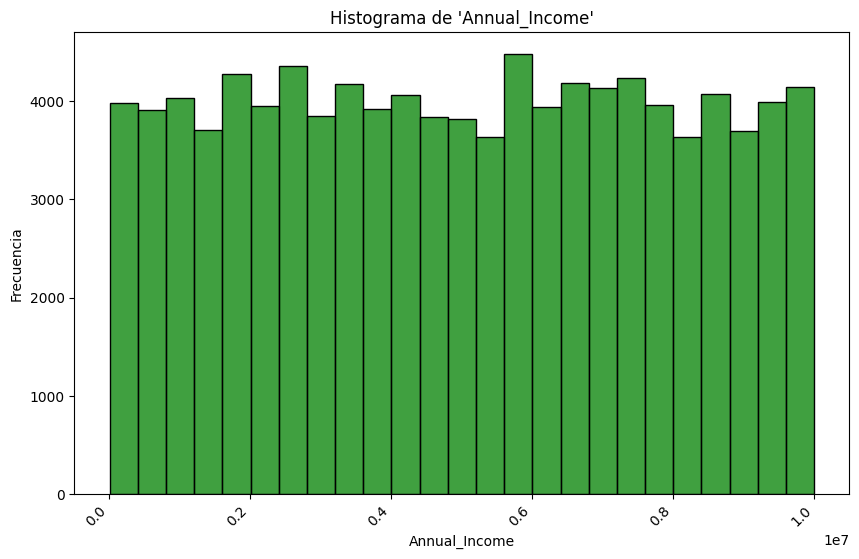

In [22]:
#ganancias anuales
analizar_columna(df, "Annual_Income")

Conteo de valores únicos en 'Applicant_Age':
27    2129
66    2095
33    1996
48    1991
41    1973
68    1942
45    1942
54    1929
35    1884
69    1869
50    1853
55    1848
76    1828
72    1817
47    1808
30    1806
60    1804
78    1803
79    1803
59    1798
25    1796
53    1775
22    1766
34    1745
57    1743
58    1732
56    1716
62    1701
70    1695
24    1695
23    1694
40    1693
61    1691
49    1683
31    1674
43    1667
71    1642
21    1638
64    1635
26    1621
37    1620
42    1606
29    1602
67    1581
65    1571
74    1559
77    1553
63    1529
28    1518
38    1499
32    1486
75    1474
39    1471
44    1415
46    1372
73    1355
36    1338
51    1309
52    1222
Name: Applicant_Age, dtype: int64

Estadísticas descriptivas de 'Applicant_Age':
count    100000.000000
mean         49.995400
std          17.056051
min          21.000000
25%          35.000000
50%          50.000000
75%          65.000000
max          79.000000
Name: Applicant_Age, dtype: float64

Valo

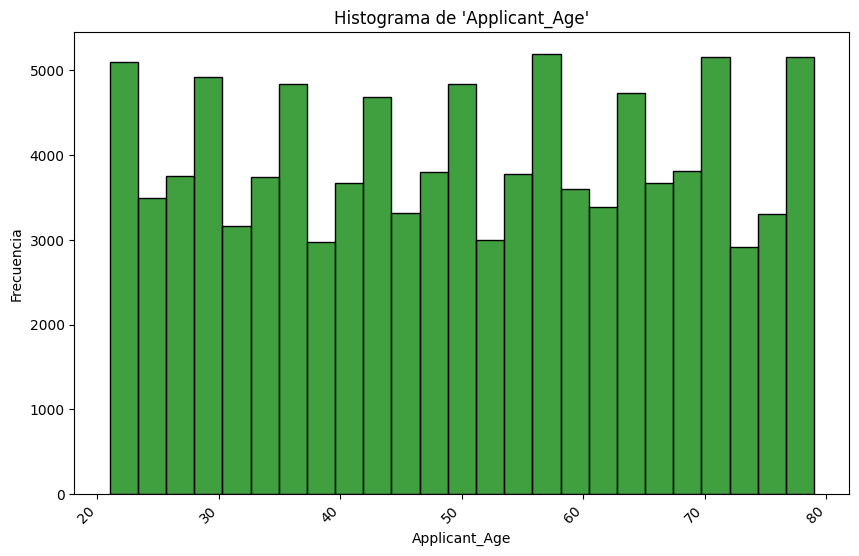

In [23]:
#edad del cliente
analizar_columna(df, "Applicant_Age")

Conteo de valores únicos en 'Work_Experience':
6     5321
9     5186
12    5100
18    5082
10    4989
14    4967
5     4950
19    4893
17    4862
16    4810
15    4777
3     4771
4     4673
13    4612
1     4544
11    4513
20    4470
8     4434
7     4377
2     4363
0     4306
Name: Work_Experience, dtype: int64

Estadísticas descriptivas de 'Work_Experience':
count    100000.000000
mean         10.110750
std           5.996007
min           0.000000
25%           5.000000
50%          10.000000
75%          15.000000
max          20.000000
Name: Work_Experience, dtype: float64

Valor máximo en 'Work_Experience': 20
Valor mínimo en 'Work_Experience': 0


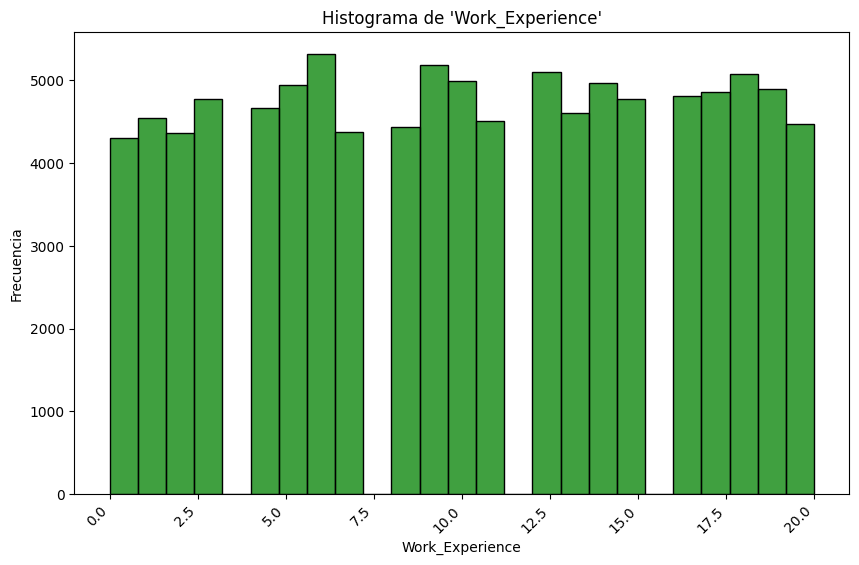

In [24]:
#experiencia de años en el mercado laboral , importante al hacer ML
analizar_columna(df, "Work_Experience")

Conteo de valores únicos en 'Marital_Status':
single     89763
married    10237
Name: Marital_Status, dtype: int64

Estadísticas descriptivas de 'Marital_Status':
count     100000
unique         2
top       single
freq       89763
Name: Marital_Status, dtype: object

Valor máximo en 'Marital_Status': single
Valor mínimo en 'Marital_Status': married


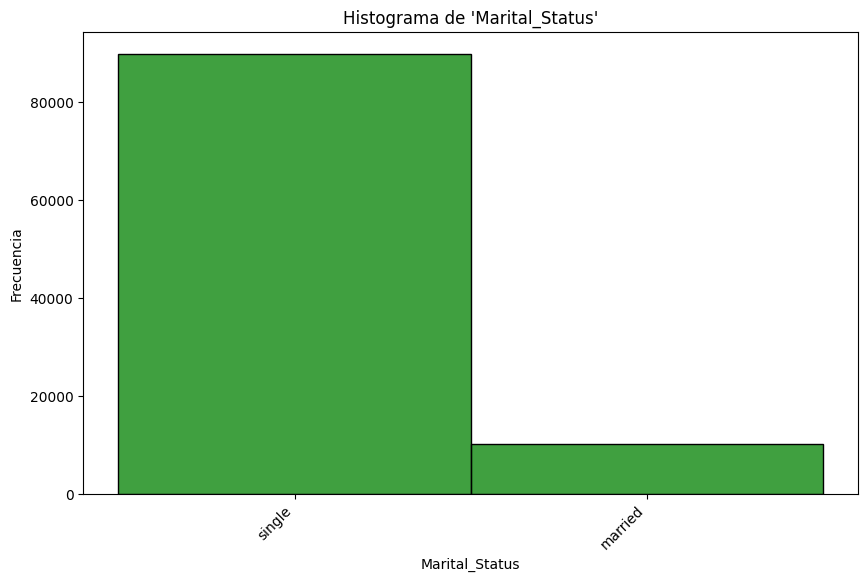

In [25]:
#esta casado o soltero??
analizar_columna(df, "Marital_Status")

Conteo de valores únicos en 'House_Ownership':
rented          92088
owned            5081
norent_noown     2831
Name: House_Ownership, dtype: int64

Estadísticas descriptivas de 'House_Ownership':
count     100000
unique         3
top       rented
freq       92088
Name: House_Ownership, dtype: object

Valor máximo en 'House_Ownership': rented
Valor mínimo en 'House_Ownership': norent_noown


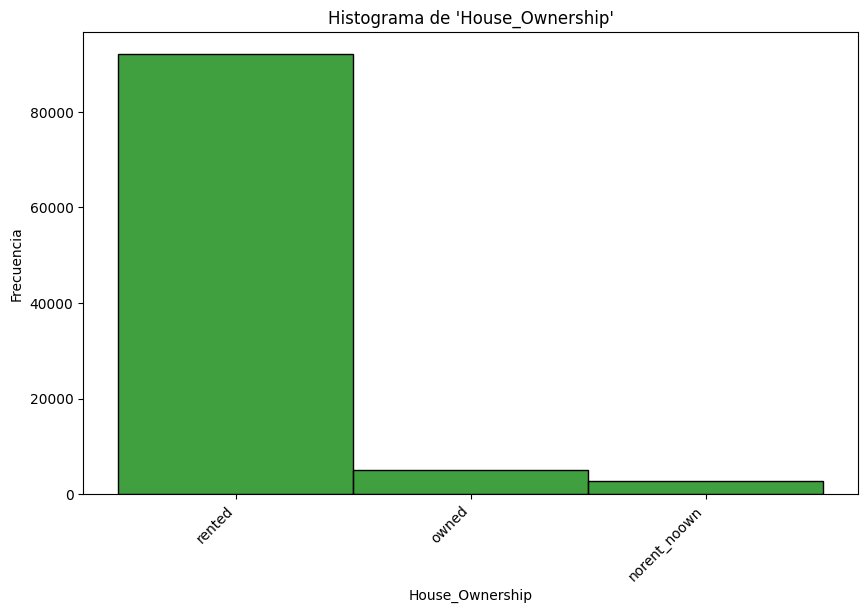

In [26]:
#vive de alquiler o es propietario ?
analizar_columna(df, "House_Ownership")

Conteo de valores únicos en 'Vehicle_Ownership(car)':
no     69665
yes    30335
Name: Vehicle_Ownership(car), dtype: int64

Estadísticas descriptivas de 'Vehicle_Ownership(car)':
count     100000
unique         2
top           no
freq       69665
Name: Vehicle_Ownership(car), dtype: object

Valor máximo en 'Vehicle_Ownership(car)': yes
Valor mínimo en 'Vehicle_Ownership(car)': no


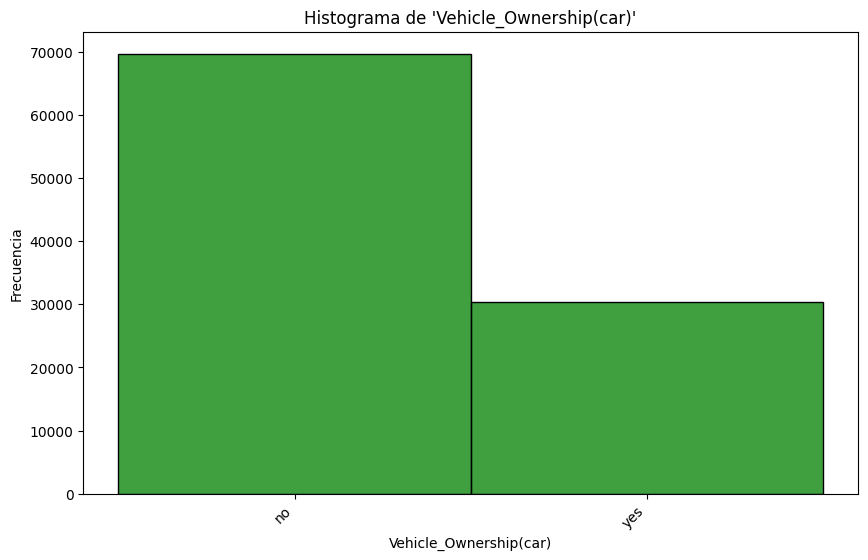

In [27]:
#tiene coche o no ?
analizar_columna(df, "Vehicle_Ownership(car)")

Conteo de valores únicos en 'Occupation':
Physician                     2426
Statistician                  2338
Fashion_Designer              2189
Psychologist                  2188
Magistrate                    2169
Computer_hardware_engineer    2169
Web_designer                  2153
Drafter                       2133
Comedian                      2103
Mechanical_engineer           2097
Chemical_engineer             2087
Air_traffic_controller        2087
Industrial_Engineer           2086
Financial_Analyst             2079
Flight_attendant              2073
Technical_writer              2060
Graphic_Designer              2059
Hotel_Manager                 2052
Secretary                     2044
Biomedical_Engineer           2039
Petroleum_Engineer            2028
Software_Developer            2016
Police_officer                1988
Computer_operator             1966
Politician                    1964
Microbiologist                1918
Technician                    1916
Consultant   

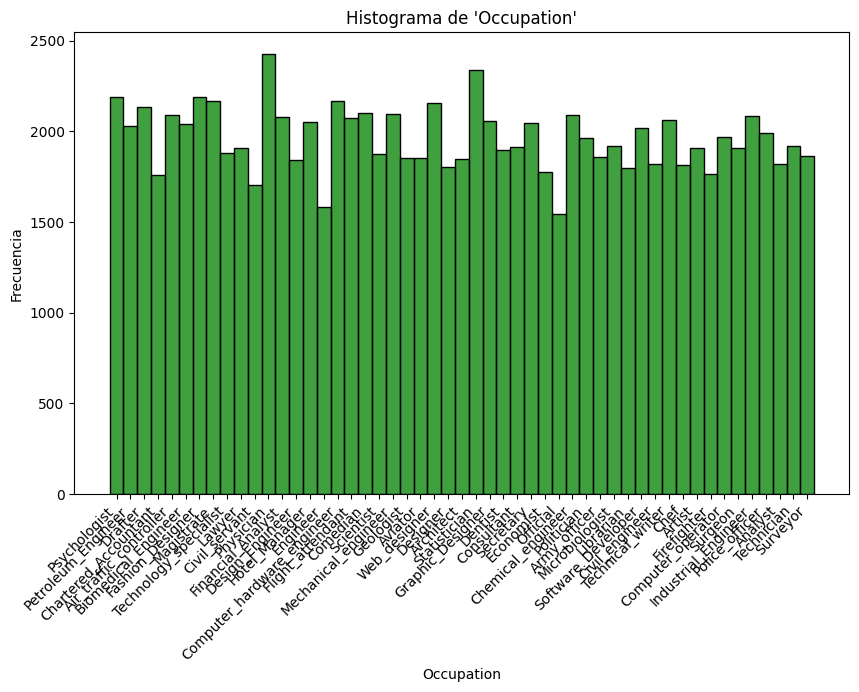

In [28]:
#ocupacion laboral del cliente
analizar_columna(df, "Occupation")

Conteo de valores únicos en 'Residence_City':
Vijayanagaram       519
Bhopal              509
Vijayawada          494
Bulandshahr         490
Saharsa[29]         490
                   ... 
Ujjain              169
Bettiah[33]         166
Katni               165
Warangal[11][12]    159
Karaikudi           149
Name: Residence_City, Length: 317, dtype: int64

Estadísticas descriptivas de 'Residence_City':
count            100000
unique              317
top       Vijayanagaram
freq                519
Name: Residence_City, dtype: object

Valor máximo en 'Residence_City': Yamunanagar
Valor mínimo en 'Residence_City': Adoni


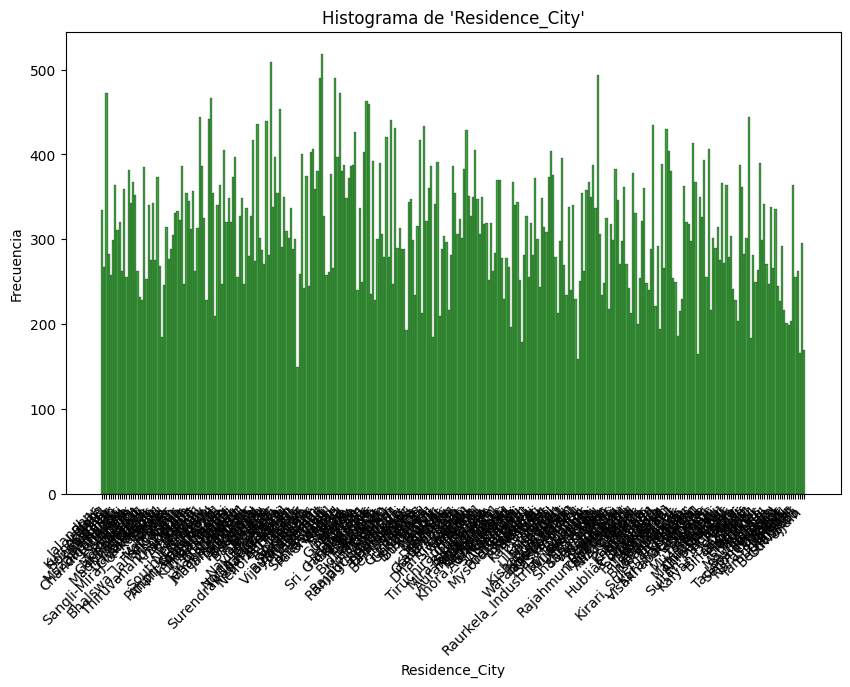

In [29]:
#ciudad de residencia:
analizar_columna(df, "Residence_City")

Conteo de valores únicos en 'Residence_State':
Uttar_Pradesh        11255
Maharashtra          10158
Andhra_Pradesh       10045
West_Bengal           9327
Bihar                 7867
Tamil_Nadu            6595
Madhya_Pradesh        5587
Karnataka             4687
Gujarat               4582
Jharkhand             3601
Rajasthan             3589
Haryana               3075
Telangana             2929
Assam                 2849
Kerala                2316
Delhi                 2183
Punjab                1886
Odisha                1833
Chhattisgarh          1513
Uttarakhand            758
Jammu_and_Kashmir      721
Puducherry             566
Mizoram                340
Manipur                338
Himachal_Pradesh       337
Tripura                312
Uttar_Pradesh[5]       287
Chandigarh             255
Sikkim                 209
Name: Residence_State, dtype: int64

Estadísticas descriptivas de 'Residence_State':
count            100000
unique               29
top       Uttar_Pradesh
freq         

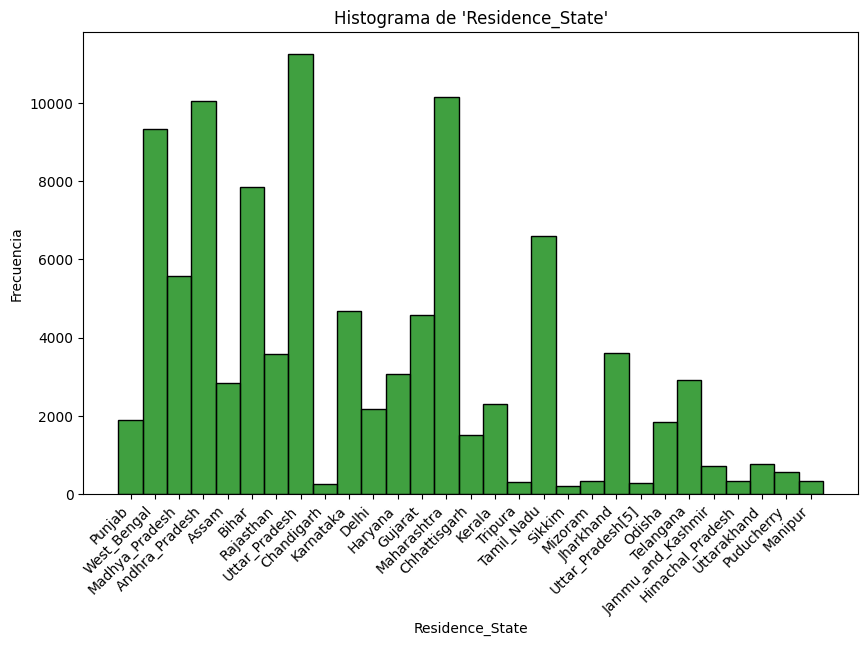

In [53]:
#estado en el que reside:
analizar_columna(df, "Residence_State")

Conteo de valores únicos en 'Years_in_Current_Employment':
3     11745
4     11330
5      9945
6      9365
7      7851
8      7399
9      6846
10     6315
11     5412
1      4544
2      4363
0      4306
12     4170
13     3652
14     2757
Name: Years_in_Current_Employment, dtype: int64

Estadísticas descriptivas de 'Years_in_Current_Employment':
count    100000.000000
mean          6.342990
std           3.644942
min           0.000000
25%           4.000000
50%           6.000000
75%           9.000000
max          14.000000
Name: Years_in_Current_Employment, dtype: float64

Valor máximo en 'Years_in_Current_Employment': 14
Valor mínimo en 'Years_in_Current_Employment': 0


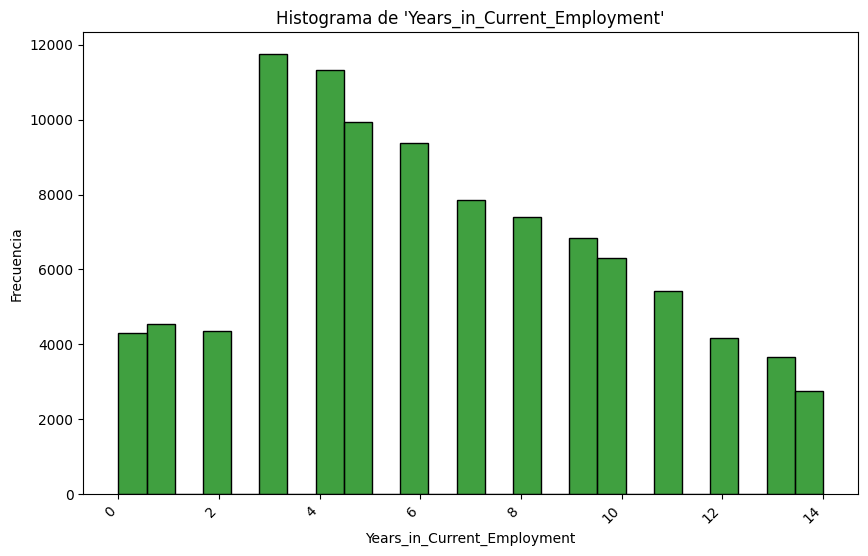

In [54]:
#años en los que lleva en la empresa
analizar_columna(df, "Years_in_Current_Employment")

Conteo de valores únicos en 'Years_in_Current_Residence':
11    20689
12    20640
13    20087
14    19343
10    19241
Name: Years_in_Current_Residence, dtype: int64

Estadísticas descriptivas de 'Years_in_Current_Residence':
count    100000.000000
mean         11.996020
std           1.396826
min          10.000000
25%          11.000000
50%          12.000000
75%          13.000000
max          14.000000
Name: Years_in_Current_Residence, dtype: float64

Valor máximo en 'Years_in_Current_Residence': 14
Valor mínimo en 'Years_in_Current_Residence': 10


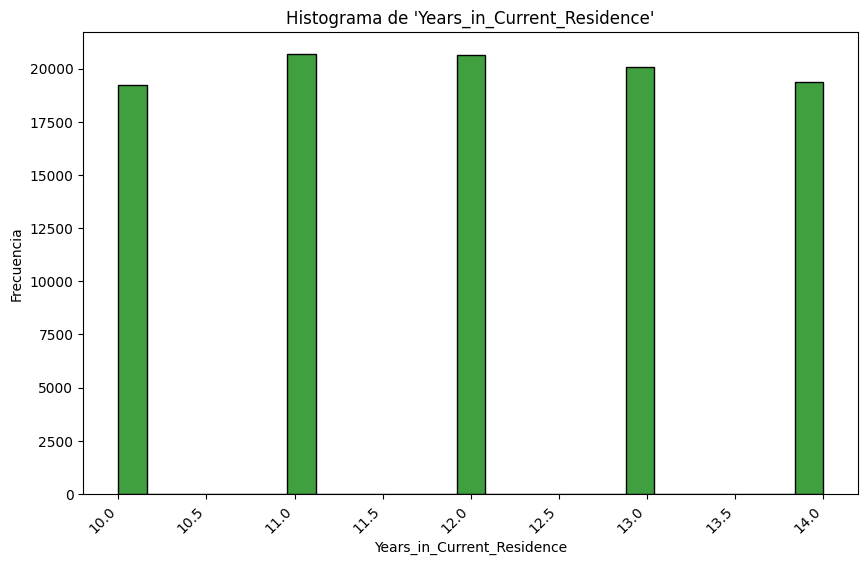

In [55]:
#años en los que lleva en la residencia:
analizar_columna(df, "Years_in_Current_Residence")

In [56]:
#aqui podemos ver la relacion entre ocupacion laboral y el estado en elq ue reside:
f.Occupation.unique(), df.Residence_State.unique()

NameError: name 'f' is not defined

<ipython-input-34-e163a74dc5bb>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)


[Text(0, 0, 'Petroleum_Engineer'),
 Text(1, 0, 'Psychologist'),
 Text(2, 0, 'Designer'),
 Text(3, 0, 'Scientist'),
 Text(4, 0, 'Surgeon'),
 Text(5, 0, 'Financial_Analyst'),
 Text(6, 0, 'Comedian'),
 Text(7, 0, 'Mechanical_engineer'),
 Text(8, 0, 'Chemical_engineer'),
 Text(9, 0, 'Artist'),
 Text(10, 0, 'Lawyer'),
 Text(11, 0, 'Consultant'),
 Text(12, 0, 'Secretary'),
 Text(13, 0, 'Surveyor'),
 Text(14, 0, 'Army_officer'),
 Text(15, 0, 'Computer_operator'),
 Text(16, 0, 'Industrial_Engineer'),
 Text(17, 0, 'Firefighter'),
 Text(18, 0, 'Fashion_Designer'),
 Text(19, 0, 'Microbiologist'),
 Text(20, 0, 'Aviator'),
 Text(21, 0, 'Architect'),
 Text(22, 0, 'Statistician'),
 Text(23, 0, 'Chartered_Accountant'),
 Text(24, 0, 'Hotel_Manager'),
 Text(25, 0, 'Biomedical_Engineer'),
 Text(26, 0, 'Technology_specialist'),
 Text(27, 0, 'Librarian'),
 Text(28, 0, 'Computer_hardware_engineer'),
 Text(29, 0, 'Technician'),
 Text(30, 0, 'Civil_servant'),
 Text(31, 0, 'Technical_writer'),
 Text(32, 0, 'Ai

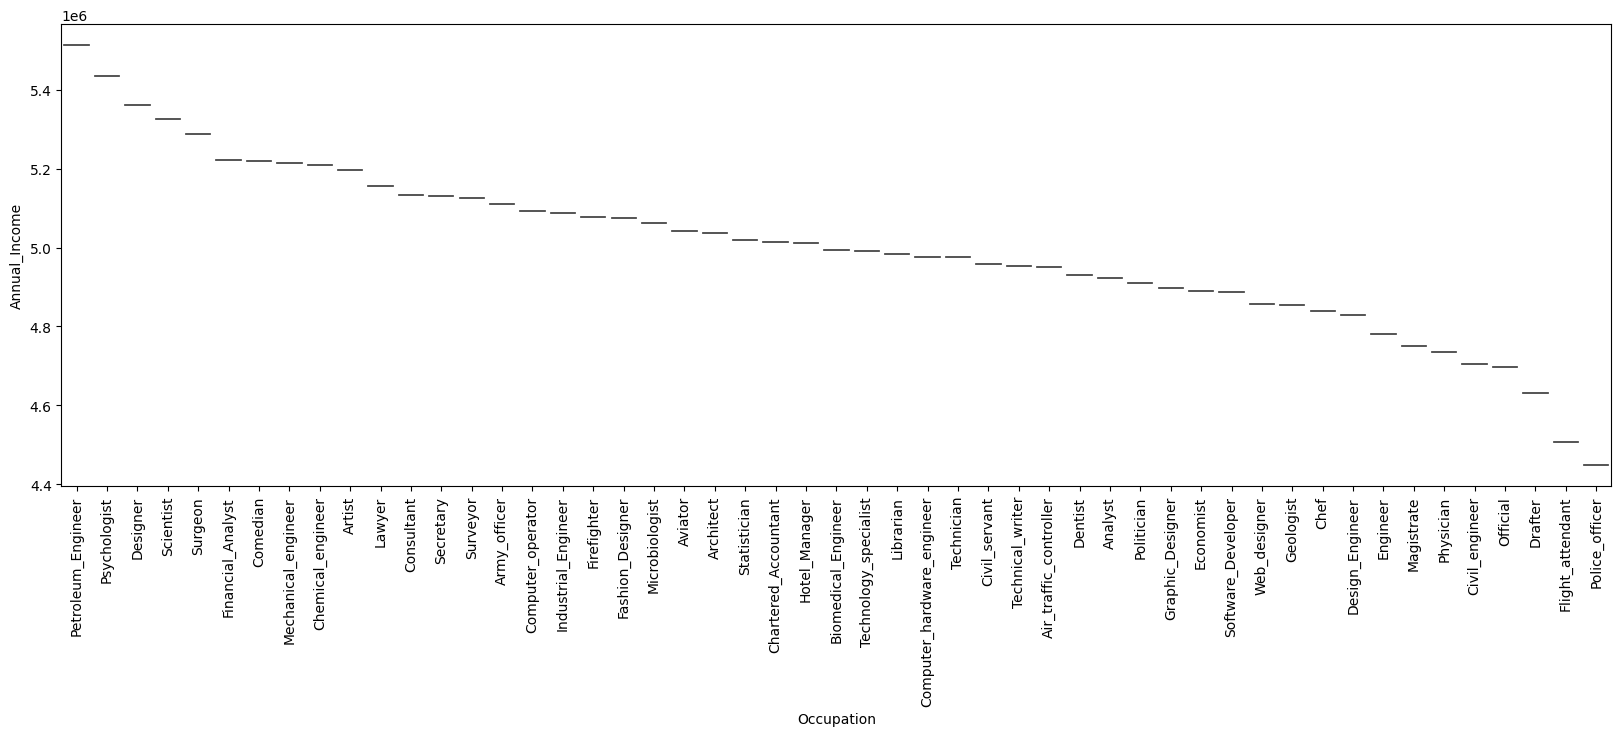

In [34]:
df_occupation = df.groupby('Occupation').agg(
    Annual_Income = ("Annual_Income", "mean")
).reset_index(drop = False).sort_values(by = 'Annual_Income', ascending = False)
df_occupation
# df_occupation.index

plot, axes = plt.subplots(nrows=1, ncols = 1, figsize = (20, 6))
sns.violinplot(data = df_occupation, x = 'Occupation', y = 'Annual_Income', ax= axes)
axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)

<ipython-input-35-ad70002d5cf7>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)


[Text(0, 0, 'Manipur'),
 Text(1, 0, 'Rajasthan'),
 Text(2, 0, 'Kerala'),
 Text(3, 0, 'West_Bengal'),
 Text(4, 0, 'Jharkhand'),
 Text(5, 0, 'Mizoram'),
 Text(6, 0, 'Andhra_Pradesh'),
 Text(7, 0, 'Bihar'),
 Text(8, 0, 'Tamil_Nadu'),
 Text(9, 0, 'Delhi'),
 Text(10, 0, 'Karnataka'),
 Text(11, 0, 'Maharashtra'),
 Text(12, 0, 'Gujarat'),
 Text(13, 0, 'Chhattisgarh'),
 Text(14, 0, 'Tripura'),
 Text(15, 0, 'Odisha'),
 Text(16, 0, 'Telangana'),
 Text(17, 0, 'Madhya_Pradesh'),
 Text(18, 0, 'Uttar_Pradesh'),
 Text(19, 0, 'Haryana'),
 Text(20, 0, 'Punjab'),
 Text(21, 0, 'Assam'),
 Text(22, 0, 'Uttarakhand'),
 Text(23, 0, 'Sikkim'),
 Text(24, 0, 'Jammu_and_Kashmir'),
 Text(25, 0, 'Uttar_Pradesh[5]'),
 Text(26, 0, 'Puducherry'),
 Text(27, 0, 'Himachal_Pradesh'),
 Text(28, 0, 'Chandigarh')]

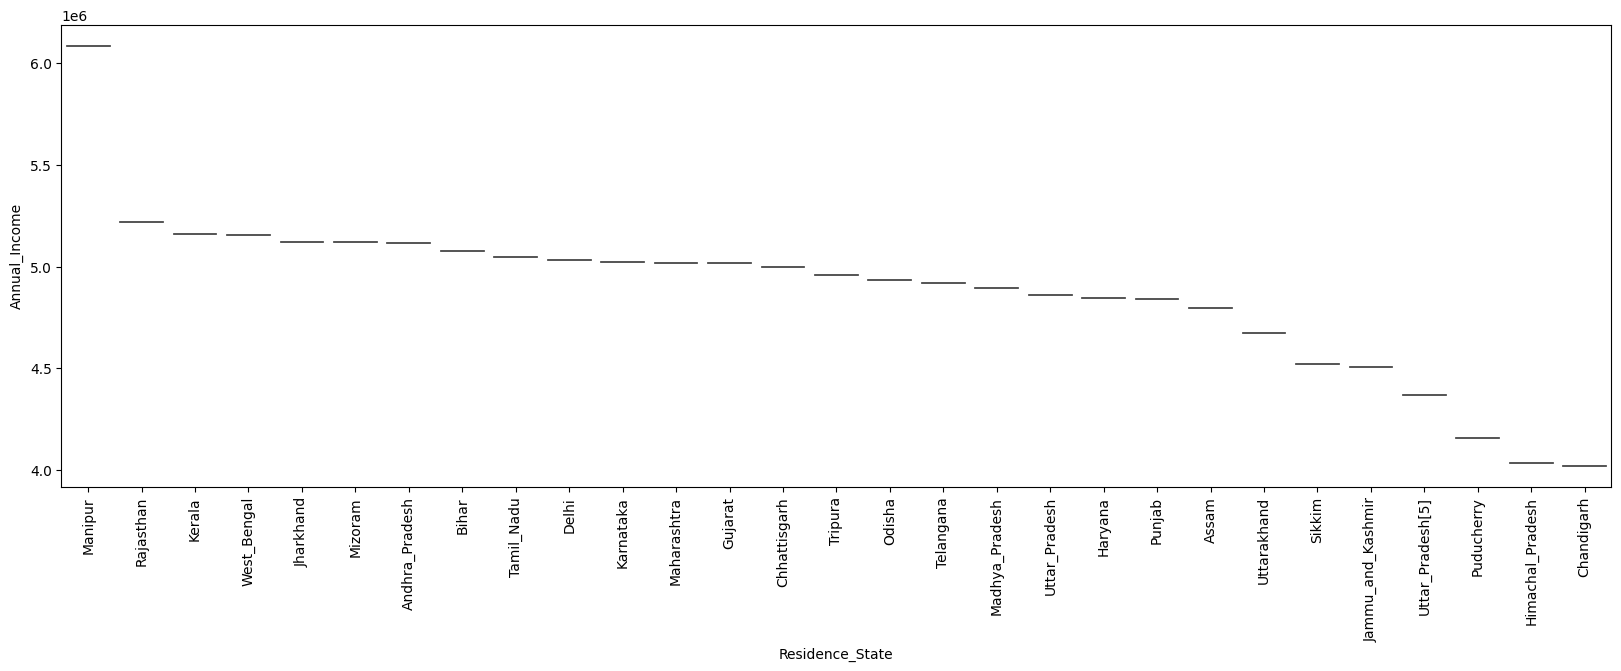

In [35]:
df_resident_state = df.groupby('Residence_State').agg(
    Annual_Income = ("Annual_Income", "mean")
).reset_index(drop = False).sort_values(by = 'Annual_Income', ascending = False)
df_occupation
# df_occupation.index

plot, axes = plt.subplots(nrows=1, ncols = 1, figsize = (20, 6))
sns.violinplot(data = df_resident_state, x = 'Residence_State', y = 'Annual_Income', ax= axes)
axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)

<Axes: xlabel='Applicant_Age', ylabel='Work_Experience'>

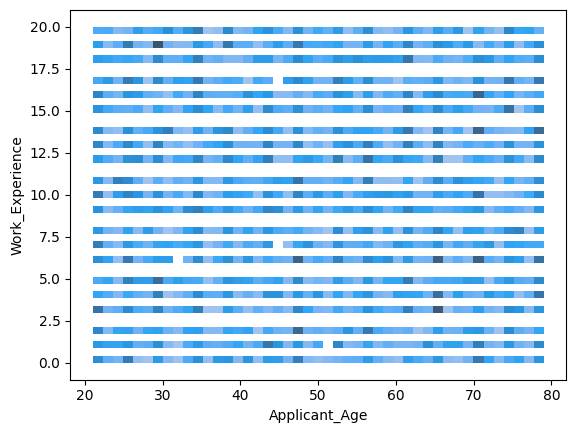

In [36]:
sns.histplot(data = df, x='Applicant_Age', y = 'Work_Experience', )

In [37]:
#6. Categorical Analysis
#Is there a statistically significant difference in Loan_Default_Risk between applicants with different Marital_Status? Use appropriate tests to analyze this relationship.

In [38]:
df.Marital_Status.value_counts()

single     89763
married    10237
Name: Marital_Status, dtype: int64

<Axes: xlabel='Marital_Status', ylabel='Loan_Default_Risk'>

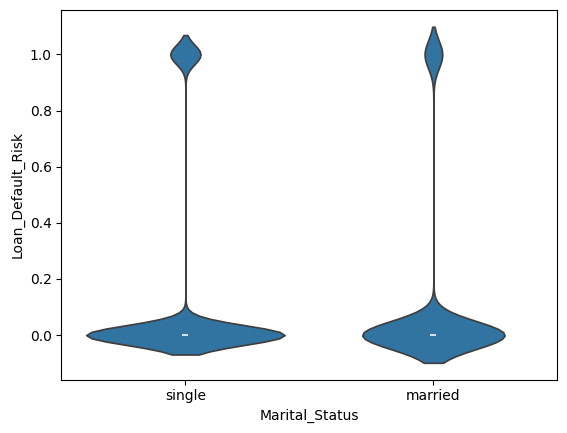

In [39]:
sns.violinplot(data = df, x = 'Marital_Status' ,y = 'Loan_Default_Risk', )

In [40]:
# in the given data single samples are 9 times more that married people. Singles show both high payback rate and a bit higher default rate compared to married people in the dataset.

In [41]:
df.Occupation.value_counts()
# physician is the most common occupation in the dataset based on the below data

Physician                     2426
Statistician                  2338
Fashion_Designer              2189
Psychologist                  2188
Magistrate                    2169
Computer_hardware_engineer    2169
Web_designer                  2153
Drafter                       2133
Comedian                      2103
Mechanical_engineer           2097
Chemical_engineer             2087
Air_traffic_controller        2087
Industrial_Engineer           2086
Financial_Analyst             2079
Flight_attendant              2073
Technical_writer              2060
Graphic_Designer              2059
Hotel_Manager                 2052
Secretary                     2044
Biomedical_Engineer           2039
Petroleum_Engineer            2028
Software_Developer            2016
Police_officer                1988
Computer_operator             1966
Politician                    1964
Microbiologist                1918
Technician                    1916
Consultant                    1911
Surgeon             

<Axes: xlabel='Years_in_Current_Employment', ylabel='Loan_Default_Risk'>

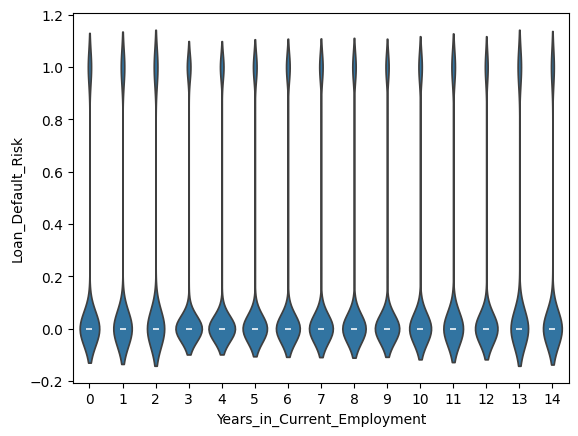

In [42]:
sns.violinplot(data = df, x = 'Years_in_Current_Employment', y = 'Loan_Default_Risk')

<Axes: xlabel='Years_in_Current_Residence', ylabel='Loan_Default_Risk'>

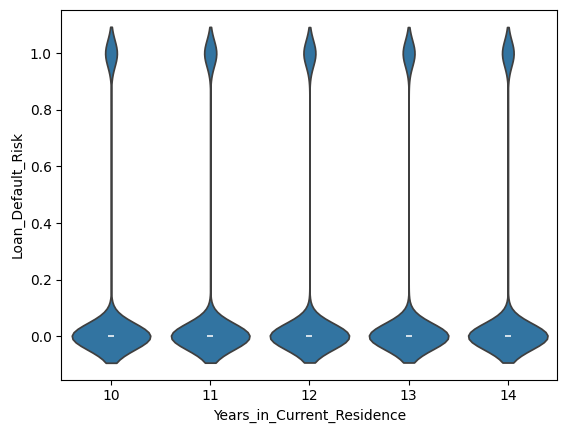

In [43]:
sns.violinplot(data = df, x = 'Years_in_Current_Residence', y = 'Loan_Default_Risk')

In [44]:
# Según los gráficos anteriores, las dos variables sugeridas no son indicadores sólidos de incumplimiento de préstamos.

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 75722 to 15796
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   Annual_Income                100000 non-null  int64 
 1   Applicant_Age                100000 non-null  int64 
 2   Work_Experience              100000 non-null  int64 
 3   Marital_Status               100000 non-null  object
 4   House_Ownership              100000 non-null  object
 5   Vehicle_Ownership(car)       100000 non-null  object
 6   Occupation                   100000 non-null  object
 7   Residence_City               100000 non-null  object
 8   Residence_State              100000 non-null  object
 9   Years_in_Current_Employment  100000 non-null  int64 
 10  Years_in_Current_Residence   100000 non-null  int64 
 11  Loan_Default_Risk            100000 non-null  int64 
dtypes: int64(6), object(6)
memory usage: 9.9+ MB


In [57]:
#acemos un encoder para preparar los ML
from sklearn.preprocessing import LabelEncoder as LE

df_clean = df.copy()

encoders = {}
for feature in df_clean.columns:
    if df_clean[feature].dtype == 'object':
        encoders[feature] = LE()
        df_clean[feature] = encoders[feature].fit_transform(df_clean[feature])

df_clean.head()

,Annual_Income,Applicant_Age,Work_Experience,Marital_Status,House_Ownership,Vehicle_Ownership(car),Occupation,Residence_City,Residence_State,Years_in_Current_Employment,Years_in_Current_Residence,Loan_Default_Risk
Applicant_ID,,,,,,,,,,,,
75722,9657655,76,0,1,2,0,40,129,19,0,12,0
80185,9259353,37,18,1,2,0,36,29,28,12,11,0
19865,1509721,66,8,1,2,0,19,126,13,4,12,0
76700,5867312,43,1,1,1,0,7,170,0,1,13,1
92992,7223191,44,9,1,2,0,0,23,28,9,13,0


<Axes: >

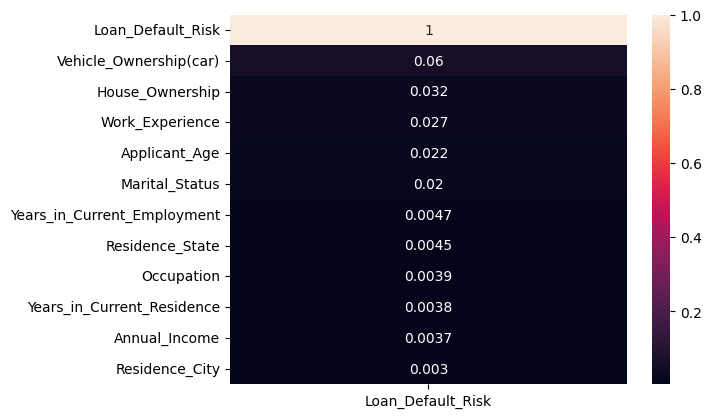

In [58]:
# entendiendo la correlacion

corr = df_clean.corr()['Loan_Default_Risk']
corr = corr.abs().sort_values(ascending = False)
sns.heatmap(corr.to_frame(), annot = True)

In [59]:
#decido borrar las columnas inferiores a 0,0038 para el entrenamiento del ML(decision three)

threshold = .0038
features_to_remove = corr[corr.abs() < threshold].index
print(f"Removing features: {features_to_remove}")

df_clean.drop(features_to_remove, inplace = True, axis = 1)

Removing features: Index(['Annual_Income', 'Residence_City'], dtype='object')


model

In [49]:
# data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_clean.drop("Loan_Default_Risk", axis=1),
    df["Loan_Default_Risk"],
    test_size = 0.2
)

In [60]:
from sklearn.preprocessing import MinMaxScaler

# Inicializar el MinMaxScaler
scaler = MinMaxScaler()

# Ajustar y transformar los datos
df_clean_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns, index=df_clean.index)

# O, si solo quieres escalar ciertas columnas, por ejemplo ['columna1', 'columna2']:
# df_clean[['columna1', 'columna2']] = scaler.fit_transform(df_clean[['columna1', 'columna2']])

# df_clean_scaled ahora contiene tus datos escalados
print(df_clean_scaled.head())


              Applicant_Age  Work_Experience  Marital_Status  House_Ownership  \
Applicant_ID                                                                    
75722              0.948276             0.00             1.0              1.0   
80185              0.275862             0.90             1.0              1.0   
19865              0.775862             0.40             1.0              1.0   
76700              0.379310             0.05             1.0              0.5   
92992              0.396552             0.45             1.0              1.0   

              Vehicle_Ownership(car)  Occupation  Residence_State  \
Applicant_ID                                                        
75722                            0.0        0.80         0.678571   
80185                            0.0        0.72         1.000000   
19865                            0.0        0.38         0.464286   
76700                            0.0        0.14         0.000000   
92992             

In [61]:
# train and test
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

pipes = {}
best_model, best_accuracy = "", 0
classifiers = [DecisionTreeClassifier, RandomForestClassifier]

for classifier in classifiers:
    model_name = classifier.__name__
    pipes[model_name] = Pipeline([
        ("scaler", StandardScaler()),
        ("classifier", classifier())
    ])

    pipes[model_name].fit(X_train, y_train)

    y_pred = pipes[model_name].predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"El modelo {model_name}, la puntuacion de accuracy es: {accuracy}")

    if best_accuracy < accuracy:
        best_accuracy = accuracy
        best_model = model_name

print(f"el mejor modelo es: {best_model} con un accuracy de : {best_accuracy}")

El modelo DecisionTreeClassifier, la puntuacion de accuracy es: 0.9306
El modelo RandomForestClassifier, la puntuacion de accuracy es: 0.9315
el mejor modelo es: RandomForestClassifier con un accuracy de : 0.9315


In [63]:
#conclusiones:
#Al evaluar la implementación de un modelo de predicción con un desempeño del 93,15% de precisión en una base de datos de riesgo de impago, se considera que dicho modelo posee una robustez adecuada para ser desplegado en un entorno de producción.
#La alta tasa de acierto sugiere que el modelo es capaz de identificar con gran fiabilidad los casos de riesgo de impago, lo cual puede ser fundamental para la toma de decisiones en contextos financieros y de crédito.